Avaliable genomes:

In [1]:
library(BSgenome)
library(rtracklayer)
library(stringr)
library(data.table)
library(dplyr)
library(ggplot2)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The

In [2]:
genomes_avail <- ucscGenomes()

In [4]:
head(genomes_avail)

,db,species,date,name
,<fct>,<fct>,<fct>,<fct>
1,hg38,Human,Dec. 2013,Genome Reference Consortium GRCh38
2,hg19,Human,Feb. 2009,Genome Reference Consortium GRCh37
3,hg18,Human,Mar. 2006,NCBI Build 36.1
4,hg17,Human,May 2004,NCBI Build 35
5,hg16,Human,Jul. 2003,NCBI Build 34
6,vicPac2,Alpaca,Mar. 2013,Broad Institute Vicugna_pacos-2.0.1


In [6]:
species_annot <- read.csv("../../meta/Patholist_selection.tsv", sep = "\t", row.names = 1)

head(species_annot)

,Fortlaufende.Nr,Patho.Nr,English,Tierart,scientific_name,sex,age,Entnahme,Tissue,Well_y,⋯,renamed,Experiment_new.lib.prep,pre.BC.CT_uc,Adapter_uc,unconverted,renamed_uc,Experiment_unconverted,enrichtment_uc,Flowcell_uc,lane_uc
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>
1,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Heart,,⋯,,,,,,,,NA,NA,NA
2,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Liver,,⋯,,,,,,,,NA,NA,NA
3,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Kidney,,⋯,,,,,,,,NA,NA,NA
4,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Spleen,,⋯,,,,,,,,NA,NA,NA
5,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Duodenum,,⋯,PK_1_D__r1,,,,,,,NA,NA,NA
6,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Lung,,⋯,,,,,,,,NA,NA,NA


now we match the species in UCSC with english and scientific names, to see the matches

In [18]:
species <- unique(as.character(species_annot$English))

In [19]:
a <- lapply(unique(genomes_avail$species), function(x) {matched <-species[str_detect(species, regex(x, ignore_case = T))]; 
                                                        ifelse(length(matched) > 0,
                                                            df <- data.frame("our_match" = matched, "ucsc_species" = x),
                                                            df <- data.frame("our_match" = "no match", "ucsc_species" = x)); 
                                                           return (df)})

Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vector.”
Warning message:
“Coercing `pattern` to a plain character vect

In [9]:
matched = rbindlist(a)

In [10]:
not_found <- matched[our_match == "no match"]

In [11]:
matched <- matched[our_match!="no match"]

In [14]:
matched <- left_join(matched , unique(species_annot[, c("English", "Tierart", "scientific_name")]), by = c("our_match" = "English"))

In [18]:
matched <- left_join(matched, genomes_avail, by = c("ucsc_species" = "species"))

In [19]:
head(matched)

our_match,ucsc_species,Tierart,scientific_name,db,date,name
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Alpaca,Alpaca,Alpaka,Vicugna pacos,vicPac2,Mar. 2013,Broad Institute Vicugna_pacos-2.0.1
Alpaca,Alpaca,Alpaka,Vicugna pacos,vicPac1,Jul. 2008,Broad Institute VicPac1.0
Armadillo,Armadillo,Guerteltier,Dasypodidae,dasNov3,Dec. 2011,Broad Institute DasNov3
Baboon,Baboon,Pavian,Papio,papAnu4,Apr. 2017,Human Genome Sequencing Center
Baboon,Baboon,Pavian,Papio,papAnu2,Mar. 2012,Baylor College of Medicine Panu_2.0
Baboon,Baboon,Pavian,Papio,papHam1,Nov. 2008,Baylor College of Medicine HGSC Pham_1.0


In [20]:
write.csv(matched, "/nobackup/lab_bock/projects/DNAmeth500species/validation/genome_matches.csv")

Manually parsing the table and removing false matches
### Working with parsed table

In [233]:
matched_f <- read.csv("/nobackup/lab_bock/projects/DNAmeth500species/validation/genome_matches_filtered.csv", 
                      sep = ";", row.names = 1, stringsAsFactors = F)
head(matched_f)

,our_match,ucsc_species,Tierart,scientific_name,db,date,name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Alpaca,Alpaca,Alpaka,Vicugna pacos,vicPac2,Mar. 2013,Broad Institute Vicugna_pacos-2.0.1
3,Armadillo,Armadillo,Guerteltier,Dasypodidae,dasNov3,Dec. 2011,Broad Institute DasNov3
4,Baboon,Baboon,Pavian,Papio,papAnu4,Apr. 2017,Human Genome Sequencing Center
9,Hamadryas baboon,Baboon,Mantelpavian,Papio hamadryas,papHam1,Nov. 2008,Baylor College of Medicine HGSC Pham_1.0
10,Bison,Bison,Bison,Bison,bisBis1,Oct. 2014,Univ. of Maryland Bison_UMD1.0
41,Cat,Cat,Katze,Felis catus,felCat9,Nov. 2017,Genome Sequencing Center (GSC) at Washington University (WashU) School of Medicine Felis_catus_9.0


In [234]:
head(species_annot)

,Fortlaufende.Nr,Patho.Nr,English,Tierart,scientific_name,sex,age,Entnahme,Tissue,Well_y,⋯,renamed,Experiment_new.lib.prep,pre.BC.CT_uc,Adapter_uc,unconverted,renamed_uc,Experiment_unconverted,enrichtment_uc,Flowcell_uc,lane_uc
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>
1,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Heart,,⋯,,,,,,,,NA,NA,NA
2,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Liver,,⋯,,,,,,,,NA,NA,NA
3,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Kidney,,⋯,,,,,,,,NA,NA,NA
4,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Spleen,,⋯,,,,,,,,NA,NA,NA
5,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Duodenum,,⋯,PK_1_D__r1,,,,,,,NA,NA,NA
6,85,47/222/09,Parma kangaroo/wallaby,ParmaKaenguru,Macropus parma,f,1 j,17.12.2009,Lung,,⋯,,,,,,,,NA,NA,NA


Now, let's check if all the other species really don't have a match

In [235]:
not_found$ucsc_species

[1] Human                           Bonobo                         
 [3] Brown kiwi                      Bushbaby                       
 [5] Chimp                           Chinese hamster                
 [7] Chinese hamster ovary cell line Chinese pangolin               
 [9] Crab-eating macaque             Dolphin                        
[11] Ferret                          Garter snake                   
[13] Gibbon                          Golden eagle                   
[15] Golden snub-nosed monkey        Gorilla                        
[17] Green Monkey                    Hawaiian monk seal             
[19] Kangaroo rat                    Malayan flying lemur           
[21] Manatee                         Microbat                       
[23] Minke whale                     Mouse lemur                    
[25] Opossum                         Pika                           
[27] Platypus                        Proboscis Monkey               
[29] Rhesus                          Rock hyrax                     
[31] Tarsier                         Tenrec                         
[33] Tree shrew                      White rhinoceros               
[35] African clawed frog             American alligator             
[37] Coelacanth                      Fugu                           
[39] Medaka                          Medium ground finch            
[41] Nile tilapia                    Painted turtle                 
[43] Stickleback                     Tetraodon                      
[45] Tibetan frog                    Turkey                         
[47] X. tropicalis                   Zebra finch                    
[49] C. intestinalis                 S. purpuratus                  
[51] A. mellifera                    A. gambiae                     
[53] D. ananassae                    D. erecta                      
[55] D. grimshawi                    D. melanogaster                
[57] D. mojavensis                   D. persimilis                  
[59] D. pseudoobscura                D. sechellia                   
[61] D. simulans                     D. virilis                     
[63] D. yakuba                       C. brenneri                    
[65] C. briggsae                     C. elegans                     
[67] C. japonica                     C. remanei                     
[69] P. pacificus                    Sea Hare                       
[71] Yeast                           Ebola Virus                    
[73] SARS-CoV-2                     
116 Levels:  A. gambiae A. mellifera African clawed frog ... Zebrafish

##### Additional matches:

Tree shrew -> Treeshrew  
?Ciona intestinalis -> C. intestinalis  
?Strongylocentrotus purpuratus -> S. purpuratus  

different eagles  
different frogs  

In [236]:
## removing wrong shrew
matched_f <- matched_f[matched_f$our_match != "Treeshrew",]

In [237]:
colnames(matched_f)

[1] "our_match"       "ucsc_species"    "Tierart"         "scientific_name"
[5] "db"              "date"            "name"

In [238]:
unique(species_annot[species_annot$English == "Treeshrew", c("English", "Tierart", "scientific_name")])

,English,Tierart,scientific_name
,<fct>,<fct>,<fct>
1636,Treeshrew,Spitzhoernchen,Scandentia


In [239]:
colnames(matched_f)

[1] "our_match"       "ucsc_species"    "Tierart"         "scientific_name"
[5] "db"              "date"            "name"

In [240]:
genomes_avail[genomes_avail$species == "Tree shrew",]

,db,species,date,name
,<fct>,<fct>,<fct>,<fct>
122,tupBel1,Tree shrew,Dec. 2006,Broad Institute Tupbel1.0


In [241]:
matched_f <- rbind(matched_f, c("our_match" = "Treeshrew", "ucsc_species" = "Tree shrew",  
                      "Tierart" = "Spitzhoernchen", "scientific_name" = "Scandentia", 
                      "db" = "tupBel1", "date" = "Dec. 2006", "name" = "Broad Institute Tupbel1.0"))

In [242]:
unique(species_annot[species_annot$scientific_name %in% c("Ciona intestinalis", "Strongylocentrotus purpuratus"), c("English", "Tierart", "scientific_name")])

,English,Tierart,scientific_name
,<fct>,<fct>,<fct>
833,Purple sea urchin,,Strongylocentrotus purpuratus
2302,Sea vase sea squirt,,Ciona intestinalis


In [243]:
genomes_avail[genomes_avail$species %in% c("C. intestinalis", "S. purpuratus"),]

,db,species,date,name
,<fct>,<fct>,<fct>,<fct>
168,ci3,C. intestinalis,Apr. 2011,Kyoto KH
169,ci2,C. intestinalis,Mar. 2005,JGI v2.0
170,ci1,C. intestinalis,Dec. 2002,JGI v1.0
172,strPur2,S. purpuratus,Sep. 2006,Baylor College of Medicine HGSC v. Spur 2.1
173,strPur1,S. purpuratus,Apr. 2005,Baylor College of Medicine HGSC v. Spur_0.5


In [244]:
matched_f <- rbind(matched_f, c("our_match" = "Purple sea urchin", "ucsc_species" = "S. purpuratus",  
                      "Tierart" = "", "scientific_name" = "Strongylocentrotus purpuratus", 
                      "db" = "strPur2", "date" = "Sep. 2006", "name" = "Baylor College of Medicine HGSC v. Spur 2.1"))

In [245]:
matched_f <- rbind(matched_f, c("our_match" = "Sea vase sea squirt", "ucsc_species" = "C. intestinalis",  
                      "Tierart" = "", "scientific_name" = "Ciona intestinalis", 
                      "db" = "ci3", "date" = "Apr. 2011", "name" = "Kyoto KH"))

adding axolotl (genome avaliable elsewhere):

In [246]:
unique(species_annot[species_annot$English == "Axolotl",  c("English", "Tierart", "scientific_name")])

,English,Tierart,scientific_name
,<fct>,<fct>,<fct>
809,Axolotl,Axolotl,Ambystoma mexicanum


In [247]:
matched_f <- rbind(matched_f, c("our_match" = "Axolotl", "ucsc_species" = "NaN",  
                      "Tierart" = "Axolotl", "scientific_name" = "Ambystoma mexicanum", 
                      "db" = "https://www.axolotl-omics.org/assemblies", "date" = " ", "name" = "AmexG_v6.0-DD"))

In [248]:
matched_f <- right_join(species_annot, matched_f, 
                        by = c("English" = "our_match", "Tierart"="Tierart", "scientific_name" = "scientific_name"))

In [249]:
setDT(matched_f)

In [250]:
NROW(matched_f[English=="Chicken"])

[1] 23

#### Evaluating the sample avialiability

1. First,we calculate the leftover sample volume

In [251]:
matched_f$DNA_vol <- as.numeric(gsub(",", ".", matched_f$DNA..ng.µl.))

In [252]:
matched_f[, volume_used:=100/matched_f$DNA_vol,]

In [253]:
matched_f[, Volume_left:=Volume..µl. - volume_used,]

2. As we need ~500 ug for wgbs we check where we have more than 5*used left:

In [254]:
matched_f[, available := 5*volume_used < Volume_left, ]

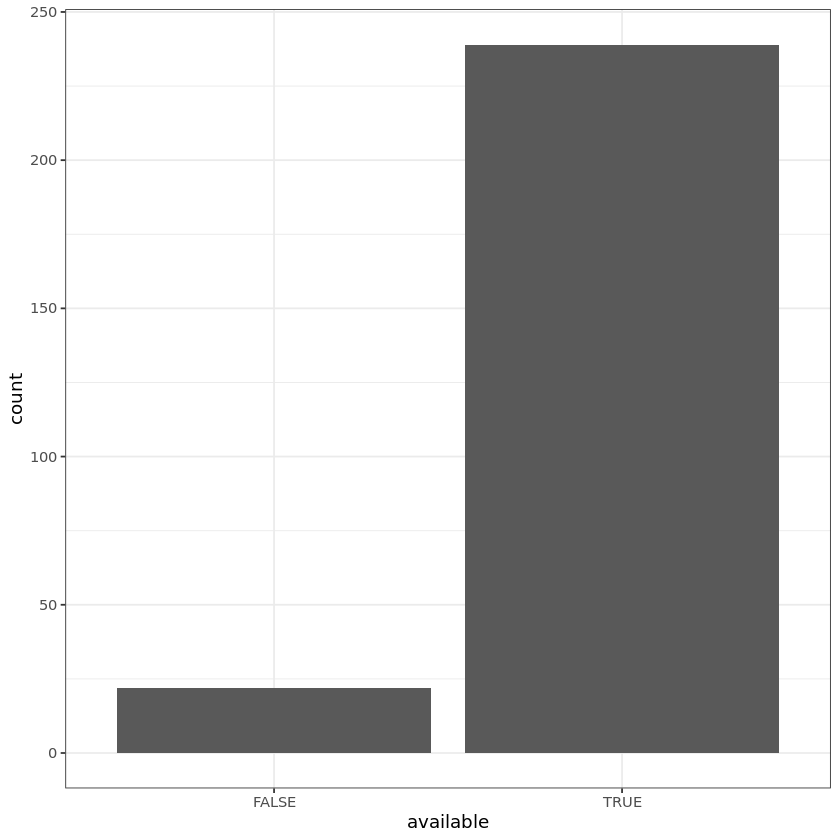

In [255]:
ggplot(matched_f, aes(x = available)) + geom_bar() + theme_bw()

3. for each species calculate the number of samples, tissues , and replicates we have with "available"==TRUE

In [256]:
NROW(matched_f)

[1] 261

In [257]:
## number of avaliable samples
matched_f <- matched_f  %>%  group_by(English) %>% mutate(n_samples = length(Tissue[available]))

In [258]:
## number of avaliable tissues
matched_f <- matched_f  %>%  group_by(English) %>% mutate(n_tissues = length(unique(Tissue[available])))

In [259]:
setDT(matched_f)

In [260]:
NROW(matched_f[English=="Chicken"])

[1] 23

In [263]:
matched_f[, replica:= sapply(Abbreviation, function(x) strsplit(as.character(x), "_")[[1]][2]),]

In [229]:
colnames(matched_f)

[1] "Fortlaufende.Nr"         "Patho.Nr"               
 [3] "English"                 "Tierart"                
 [5] "scientific_name"         "sex"                    
 [7] "age"                     "Entnahme"               
 [9] "Tissue"                  "Well_y"                 
[11] "Well_x"                  "Abbreviation"           
[13] "DNA..ng.µl."             "Volume..µl."            
[15] "DNA.prep.date"           "comment"                
[17] "Box"                     "RRBS.status"            
[19] "Experiment.ID"           "pre.BC_CT"              
[21] "Enrichment.cycles"       "Pool"                   
[23] "Adapter"                 "FlowCell"               
[25] "lane"                    "renamed"                
[27] "Experiment_new.lib.prep" "pre.BC.CT_uc"           
[29] "Adapter_uc"              "unconverted"            
[31] "renamed_uc"              "Experiment_unconverted" 
[33] "enrichtment_uc"          "Flowcell_uc"            
[35] "lane_uc"                 "ucsc_species"           
[37] "db"                      "date"                   
[39] "name"                    "DNA_vol"                
[41] "volume_used"             "Volume_left"            
[43] "available"               "n_samples"              
[45] "n_tissues"               "replica"

In [275]:
## number of avaliable replicas
matched_f <- matched_f  %>% group_by(English) %>% mutate(n_replicas = length(unique(replica[available])))

In [284]:
matched_f$Enrichment.cycles <- as.numeric(matched_f$Enrichment.cycles)

In [286]:
matched_f$Enrichment.cycles

[1]  5  8  8  5  8  5  5  8  5  4  4  4  1  4  4  4  4  4  6  4  4  5  7  7  5
 [26]  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  5 12 13  5 13  1  5  3  3
 [51]  3  1  4  4  4  4  4  2  2 13  2 12  4 13  2 13  2  4  5  3 13 13  5 13 13
 [76]  5 13  5  5  5 13  5 13  5 13  5  6  2 13  3  2 12 13 12 12  5 12 12 13 12
[101] 12 12 12  2  2 13 12 12 10  3 13 12  3  2  4  4  4  2  6  4  2  3  6  4  3
[126]  6  4  3  4  4  2  4  4  4  6  3  4  3  3  3  4  3  4  4  4  2  5  4 13  4
[151]  3 13  4  2  2  2  1 13 13  2  4  2  4  5  4  5  2  3  4  5  2  4  4  2 13
[176]  2  4  3  3 13  4  3  3  6  3  3  6  6  6  3  4 13 13  3  6  3  2  2  2 13
[201] 13 13 13 13 13 13 13 13 13 13 13  3  3  3  3  3  3  3  3  3  3  3  3  3  3
[226]  3  3  3  3 13 13 13  3  7  7  7  1  7  7  1  7  4  6  4  3  5  3  3  4  2
[251]  6  2  3  4  3  3  5  4  4  5  3

In [288]:
matched_f <- matched_f %>% group_by(English) %>% mutate(max_PCR = max(Enrichment.cycles), mean_PCR = mean(Enrichment.cycles))

In [293]:
matched_f <- matched_f %>% group_by(English) %>% mutate(percent_avail = length(available==TRUE)/length(Tissue))

In [291]:
colnames(matched_f)

[1] "Fortlaufende.Nr"         "Patho.Nr"               
 [3] "English"                 "Tierart"                
 [5] "scientific_name"         "sex"                    
 [7] "age"                     "Entnahme"               
 [9] "Tissue"                  "Well_y"                 
[11] "Well_x"                  "Abbreviation"           
[13] "DNA..ng.µl."             "Volume..µl."            
[15] "DNA.prep.date"           "comment"                
[17] "Box"                     "RRBS.status"            
[19] "Experiment.ID"           "pre.BC_CT"              
[21] "Enrichment.cycles"       "Pool"                   
[23] "Adapter"                 "FlowCell"               
[25] "lane"                    "renamed"                
[27] "Experiment_new.lib.prep" "pre.BC.CT_uc"           
[29] "Adapter_uc"              "unconverted"            
[31] "renamed_uc"              "Experiment_unconverted" 
[33] "enrichtment_uc"          "Flowcell_uc"            
[35] "lane_uc"                 "ucsc_species"           
[37] "db"                      "date"                   
[39] "name"                    "DNA_vol"                
[41] "volume_used"             "Volume_left"            
[43] "available"               "n_samples"              
[45] "n_tissues"               "replica"                
[47] "n_replicas"              "max_PCR"                
[49] "mean_PCR"                "percent_avail"

In [325]:
matched_f_summary <- unique(matched_f[, c('English','Tierart', 'scientific_name','ucsc_species','db','date','name',
                     'n_samples','n_tissues','n_replicas','max_PCR','mean_PCR','percent_avail')])

In [306]:
rank(matched_f_summary$max_PCR)

[1] 47.5 47.5 17.5 31.5 31.5 43.0 43.0 17.5 17.5 31.5 52.5 82.0 17.5 82.0 82.0
 [16] 17.5 82.0 52.5 82.0 52.5 82.0  8.0 31.5 82.0 82.0 82.0 82.0 31.5 82.0  3.5
 [31]  1.5 82.0 52.5 52.5 82.0 82.0 52.5 82.0 82.0 52.5 82.0 82.0 82.0 52.5 31.5
 [46] 31.5 31.5  3.5 17.5 82.0 82.0 17.5 82.0 82.0  8.0 82.0 82.0 82.0 17.5 31.5
 [61] 17.5 17.5 17.5  8.0  8.0 82.0  8.0 82.0 31.5 82.0 82.0 82.0 31.5 82.0 82.0
 [76] 31.5  1.5 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0 82.0
 [91] 82.0 43.0 43.0 43.0 43.0 43.0 31.5 31.5 82.0 17.5  8.0  8.0 31.5 31.5 82.0
[106] 82.0 82.0

for each of this criteria we define a rank, and then create a mean rank across all of them, to create a priority list:

In [326]:
matched_f_summary <- matched_f_summary %>%ungroup() %>% mutate(rank_PCR_max = dense_rank(max_PCR), 
                                          rank_PCR_mean = dense_rank(mean_PCR), 
                                          rank_n_samples = dense_rank(-n_samples),
                                          rank_n_replicas = dense_rank(-n_replicas))

In [327]:
setDT(matched_f_summary)

In [329]:
matched_f_summary[, mean_rank:= 0.25*(rank_PCR_mean + rank_PCR_max + rank_n_replicas+ rank_n_samples),]

In [330]:
write.csv(matched_f_summary[order(mean_rank)], "/nobackup/lab_bock/projects/DNAmeth500species/validation/genome_matches_filtered_annot_2.csv")